In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization
from PIL import  Image
%matplotlib inline
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the NGSIM dataset using pandas
#df = pd.read_csv("/content/drive/MyDrive/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv")
from pathlib import Path
p = Path().cwd()
print(f"original File path: {p}")
print(p)
#updating to add the data to the file path and removing the current ipynb code library
stringpath= str(p)[0:str(p).rfind('\\')] + '\\data'
print(f"Updated File Path to pick from Data Library: { stringpath}")
ngsimfile=stringpath + '/' + 'Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv'
ngsim = pd.read_csv(ngsimfile,low_memory=False)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Updated File Path to pick from Data Library: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [3]:
df=ngsim
df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,...,NaN,NaN,NaN,NaN,NaN,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,...,NaN,NaN,NaN,NaN,NaN,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,...,NaN,NaN,NaN,NaN,NaN,385,406,90.95,3.77,i-80
11850524,599,875,577,1113436854400,77.094,621.358,6042831.282,2133693.854,15.3,6.4,...,NaN,NaN,NaN,NaN,NaN,0,611,0.00,0.00,i-80


In [4]:
# evaluate the data type, percentage of missing values, number of unique values, and unique values for each feature
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [5]:
sniff_modified(df)

,data type,percent missing,No. unique,unique values
Vehicle_ID,int64,0.000000,3233,"[515, 2224, 2127, 1033, 1890, 744, 879, 2283, ..."
Frame_ID,int64,0.000000,11691,"[2330, 6548, 6459, 4827, 9157, 3392, 6336, 800..."
Total_Frames,int64,0.000000,1837,"[1123, 1902, 567, 592, 628, 996, 811, 1821, 11..."
Global_Time,int64,0.000000,88516,"[1118848075000, 1113437421700, 1118847624800, ..."
Following,int64,0.000000,3234,"[523, 2211, 2132, 1040, 1897, 752, 881, 2344, ..."
Preceding,int64,0.000000,3228,"[500, 2208, 2124, 1029, 1882, 740, 869, 2330, ..."
v_Class,int64,0.000000,3,"[2, 3, 1]"
Lane_ID,int64,0.000000,18,"[3, 4, 2, 1, 5, 6, 12, 0, 11, 7, 8, 31, 101, 9..."
Space_Headway,float64,0.000000,88292,"[119.1, 53.34, 48.92, 38.81, 102.65, 37.8, 22...."
Movement,float64,79.062482,4,"[nan, 1.0, 2.0, 3.0]"


In [6]:
#Using the describe to see the quarters values  in each feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vehicle_ID,11850526.0,1.272563e+03,7.792891e+02,1.000000e+00,6.330000e+02,1.195000e+03,1.824000e+03,3.366000e+03
Frame_ID,11850526.0,5.174503e+03,2.608943e+03,1.000000e+00,2.987000e+03,5.222000e+03,7.354000e+03,1.169100e+04
Total_Frames,11850526.0,8.930487e+02,4.020496e+02,2.000000e+00,6.190000e+02,8.240000e+02,1.038000e+03,2.434000e+03
Global_Time,11850526.0,1.034354e+12,2.915348e+11,1.163019e+09,1.113437e+12,1.118847e+12,1.118849e+12,1.118938e+12
Local_X,11850526.0,2.794686e+01,2.495012e+01,-3.256250e+02,1.453300e+01,2.932300e+01,4.332900e+01,1.608840e+02
Local_Y,11850526.0,9.168111e+02,5.502644e+02,0.000000e+00,4.512030e+02,8.573970e+02,1.351873e+03,2.235252e+03
Global_X,11850526.0,5.982983e+06,1.076391e+06,2.230210e+06,6.042757e+06,6.451253e+06,6.452048e+06,6.452741e+06
Global_Y,11850526.0,1.936843e+06,2.008363e+05,1.375533e+06,1.872593e+06,1.873236e+06,2.133669e+06,2.134845e+06
v_length,11850526.0,1.569627e+01,5.611962e+00,3.500000e+00,1.380000e+01,1.500000e+01,1.600000e+01,7.770000e+01
v_Width,11850526.0,6.626444e+00,8.725600e-01,2.000000e+00,5.900000e+00,6.800000e+00,7.000000e+00,8.500000e+00


In [7]:
df.head().T

,0,1,2,3,4
Vehicle_ID,515,515,2224,2127,1033
Frame_ID,2330,2330,6548,6459,4827
Total_Frames,1123,1123,1902,567,592
Global_Time,1118848075000,1118848075000,1113437421700,1118847624800,1118848324700
Local_X,30.034,30.034,41.429,19.632,6.202
Local_Y,188.062,188.062,472.901,1775.614,1701.144
Global_X,6451203.729,6451203.729,6042814.264,6452425.122,6452347.673
Global_Y,1873252.549,1873252.549,2133542.012,1872172.475,1872258.452
v_length,13.0,13.0,14.3,13.5,13.5
v_Width,6.9,6.9,6.9,6.9,4.4


In [8]:
df.tail()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,...,NaN,NaN,NaN,NaN,NaN,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,...,NaN,NaN,NaN,NaN,NaN,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,...,NaN,NaN,NaN,NaN,NaN,385,406,90.95,3.77,i-80
11850524,599,875,577,1113436854400,77.094,621.358,6042831.282,2133693.854,15.3,6.4,...,NaN,NaN,NaN,NaN,NaN,0,611,0.00,0.00,i-80
11850525,2006,6461,879,1113437413000,73.816,695.035,6042818.859,2133766.666,14.8,6.9,...,NaN,NaN,NaN,NaN,NaN,2009,2014,25.47,2.26,i-80


In [9]:
# total null values from each feature.
df.isnull().sum()

Vehicle_ID             0
Frame_ID               0
Total_Frames           0
Global_Time            0
Local_X                0
Local_Y                0
Global_X               0
Global_Y               0
v_length               0
v_Width                0
v_Class                0
v_Vel                  0
v_Acc                  0
Lane_ID                0
O_Zone           9369320
D_Zone           9369320
Int_ID           9369320
Section_ID       9369320
Direction        9369320
Movement         9369320
Preceding              0
Following              0
Space_Headway          0
Time_Headway           0
Location               0
dtype: int64

In [10]:
ngsim = df.head(1000)

<AxesSubplot:>

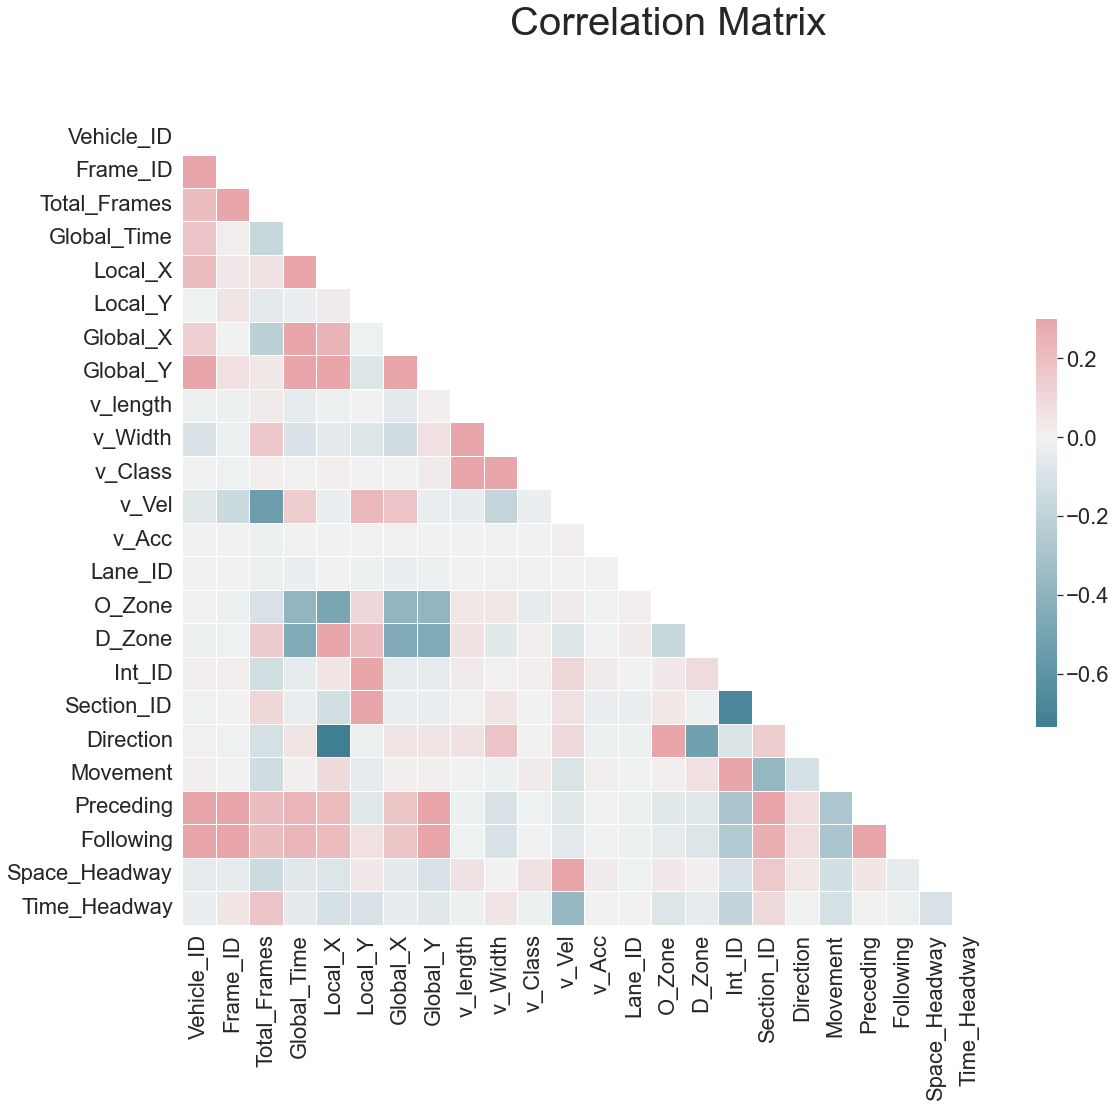

In [11]:
# Creating heatmap to observe correlation between each numerical values
# Set Background
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = df.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:title={'center':'Correlation with Response Variable '}>

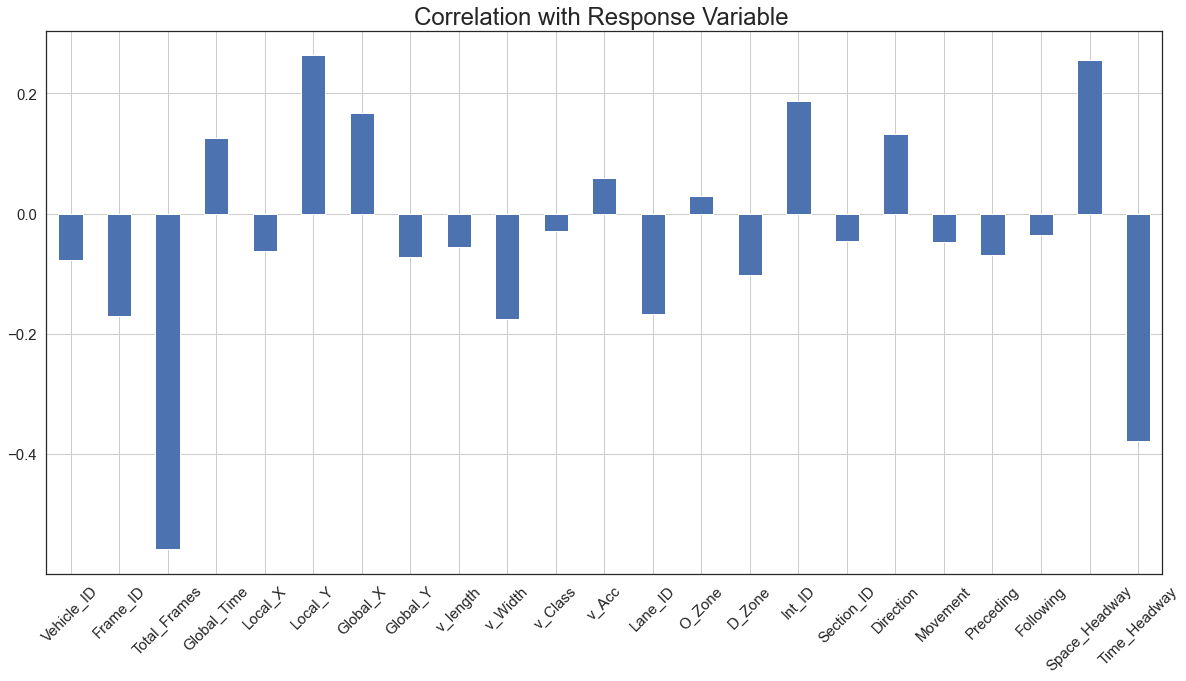

In [12]:
#Droping response variable ('speed')
ngsim1 = ngsim.drop('v_Vel', axis =1)
# Correlation Plot with the Response variable
ngsim1.corrwith(ngsim.v_Vel).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable ', 
                                   fontsize = 15, rot = 45, grid = True)

<AxesSubplot:title={'center':'Correlation with Response Variable '}>

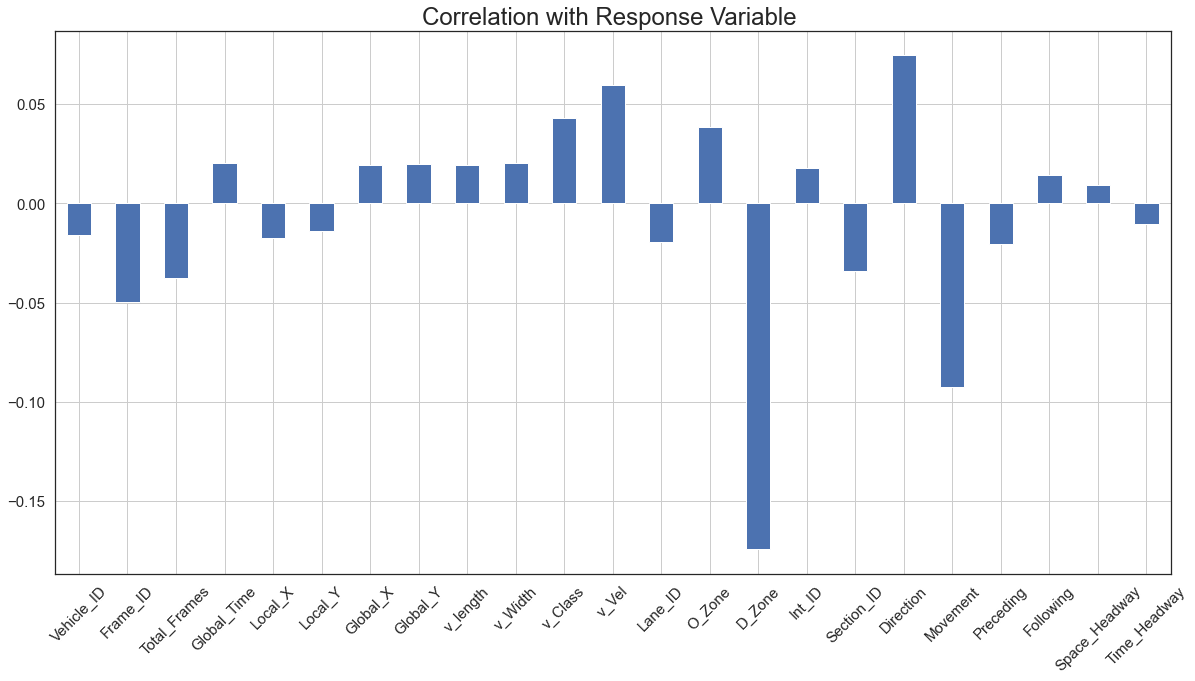

In [13]:
#Droping response variable ('acceleration')
ngsim1 = ngsim.drop('v_Acc', axis =1)
# Correlation Plot with the Response variable
ngsim1.corrwith(ngsim.v_Acc).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable ', 
                                   fontsize = 15, rot = 45, grid = True)

<AxesSubplot:title={'center':'Correlation with Response Variable '}>

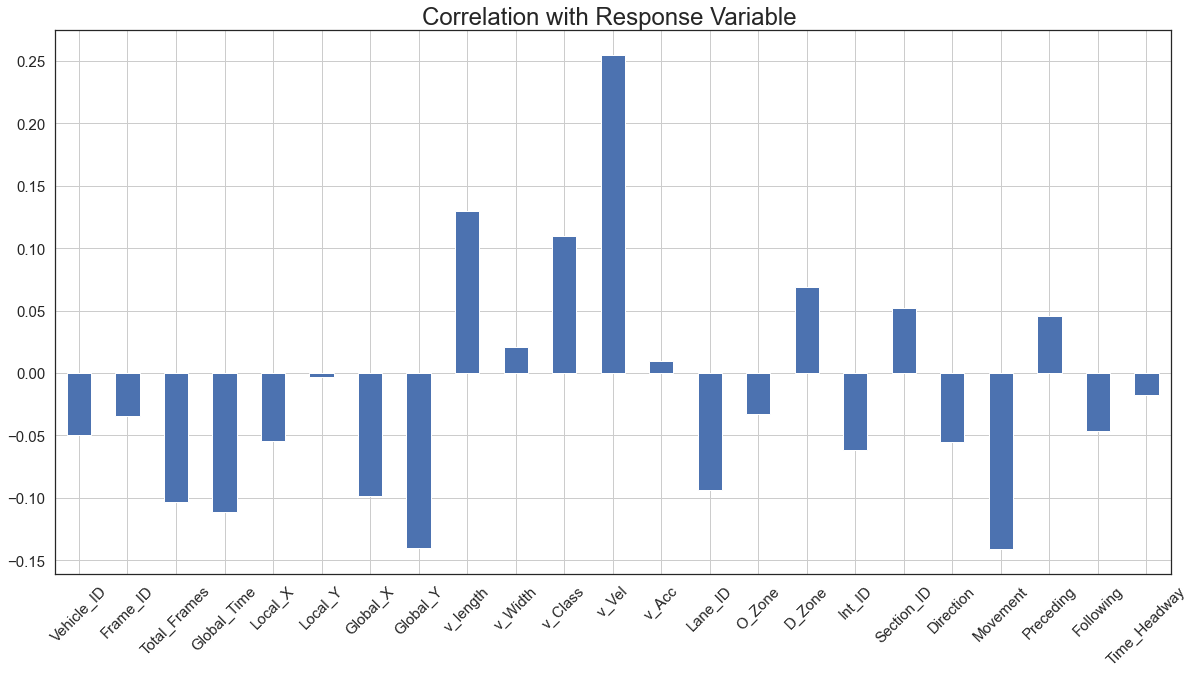

In [14]:
#Droping response variable ('speed')
ngsim1 = ngsim.drop('Space_Headway', axis =1)
# Correlation Plot with the Response variable
ngsim1.corrwith(ngsim.Space_Headway).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable ', 
                                   fontsize = 15, rot = 45, grid = True)

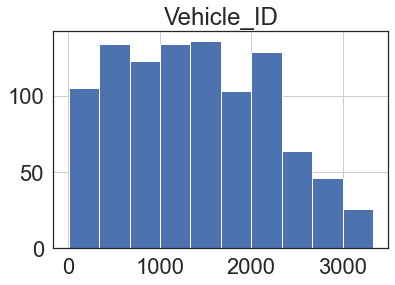

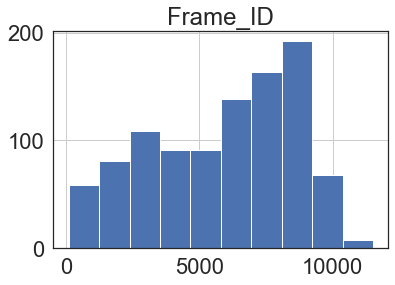

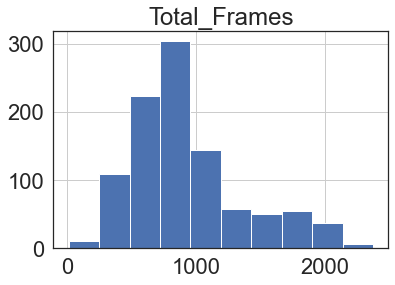

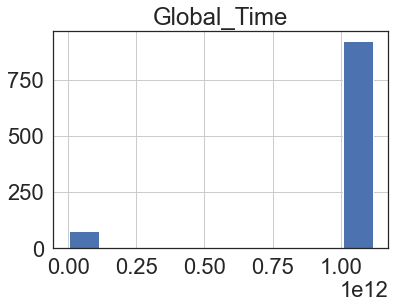

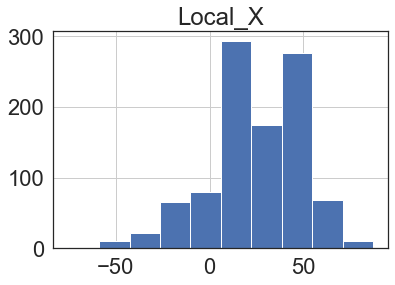

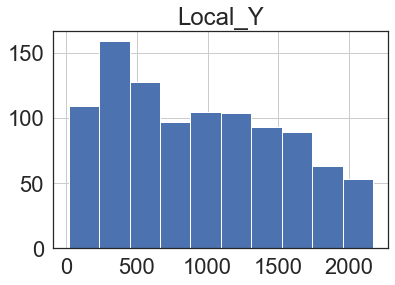

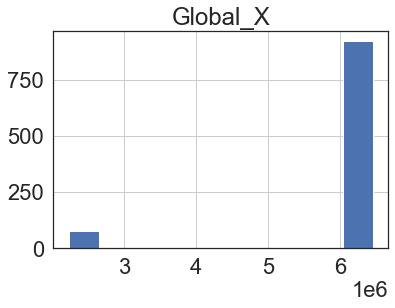

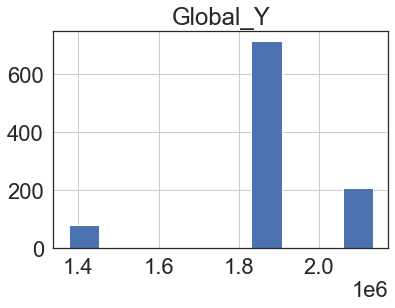

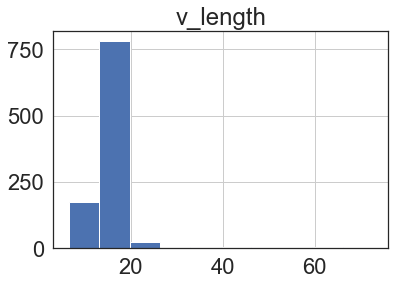

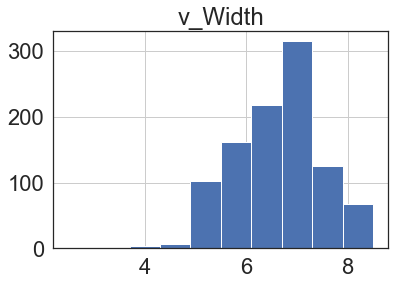

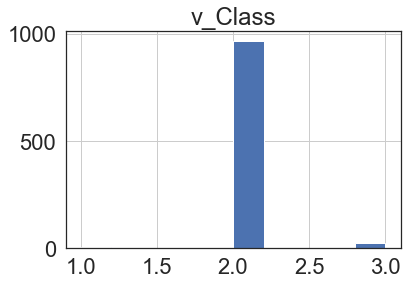

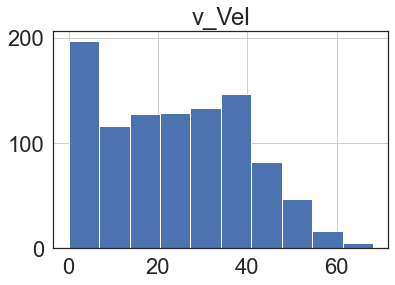

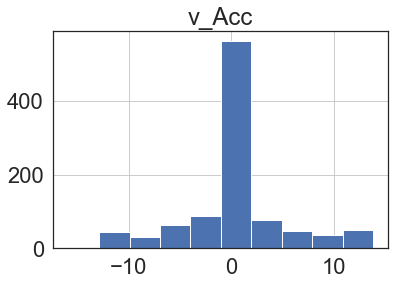

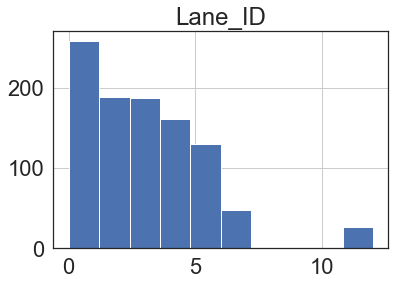

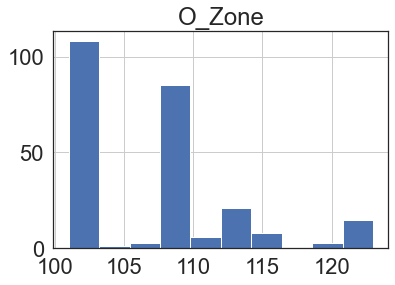

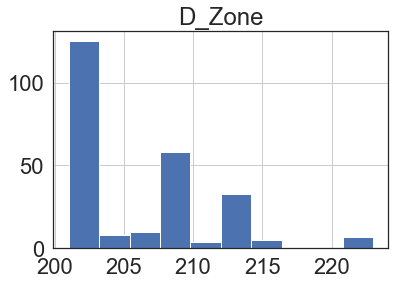

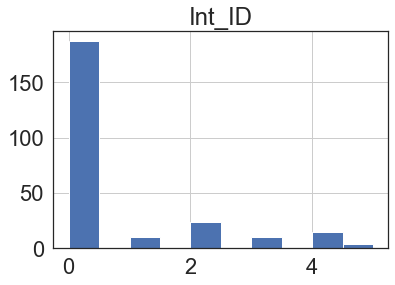

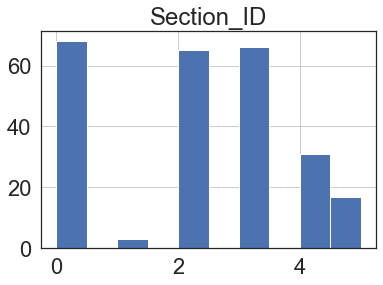

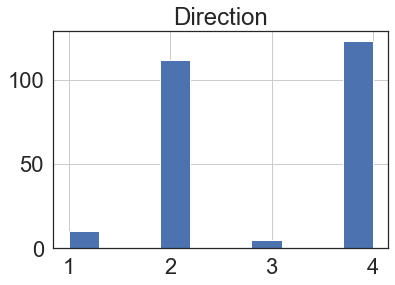

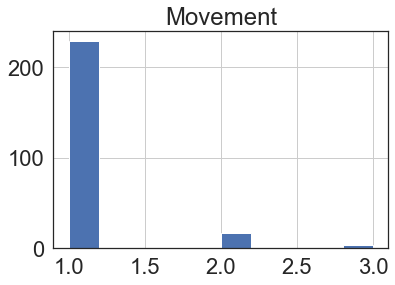

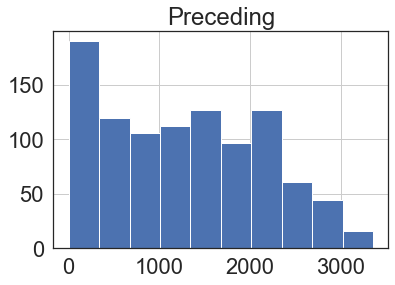

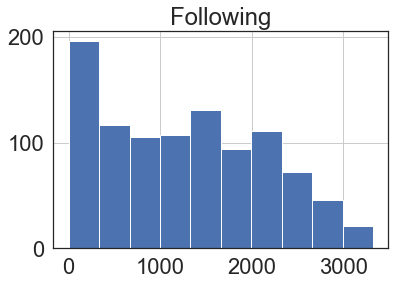

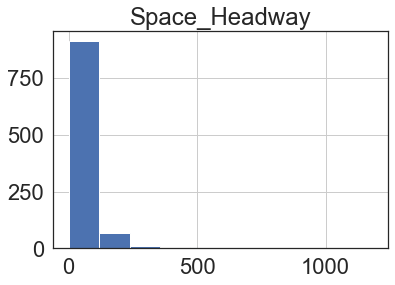

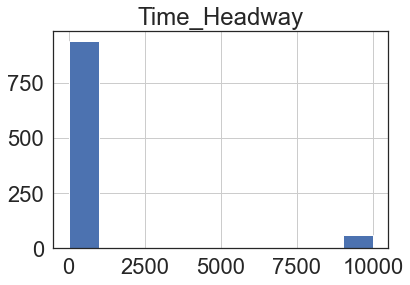

In [15]:

for i in ngsim.drop('Location', axis=1 ).columns :
    ngsim.hist(i)
plt.show()

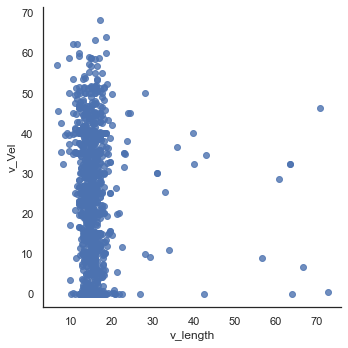

In [16]:
 sns.set(style = 'white', font_scale =1)
 sns.lmplot(data=ngsim, x='v_length', y='v_Vel', 
                   fit_reg=False, legend=True, legend_out=True)

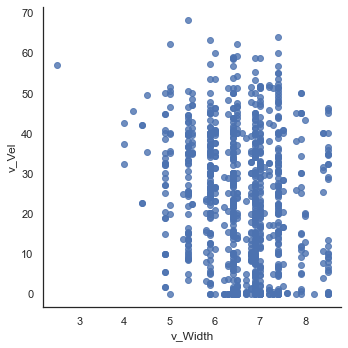

In [17]:
 sns.lmplot(data=ngsim, x='v_Width', y='v_Vel', 
                   fit_reg=False, legend=True, legend_out=True)

<AxesSubplot:xlabel='v_length', ylabel='Space_Headway'>

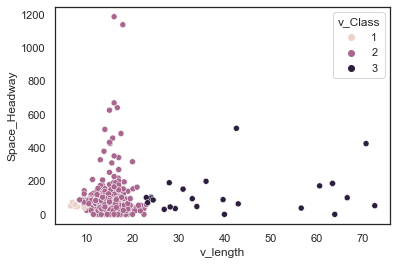

In [18]:
 sns.scatterplot(data=ngsim, x='v_length', y='Space_Headway', hue = 'v_Class',)

<AxesSubplot:xlabel='v_Width', ylabel='Space_Headway'>

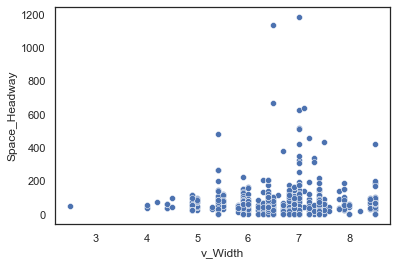

In [19]:
sns.scatterplot(data=ngsim, x='v_Width', y='Space_Headway')

<AxesSubplot:xlabel='v_Width', ylabel='Space_Headway'>

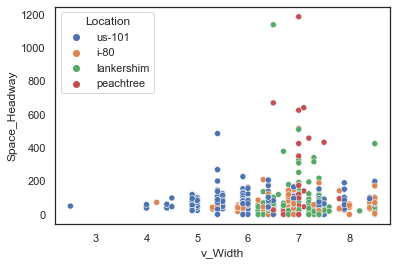

In [20]:
sns.scatterplot(data=ngsim, x='v_Width', y='Space_Headway', hue = "Location")

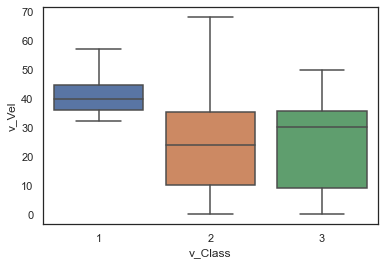

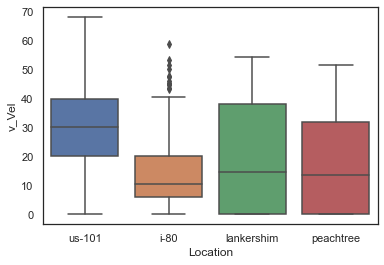

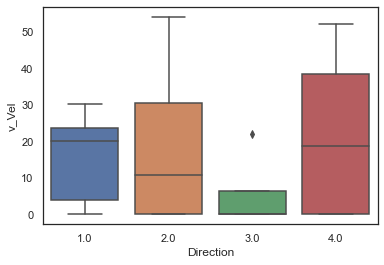

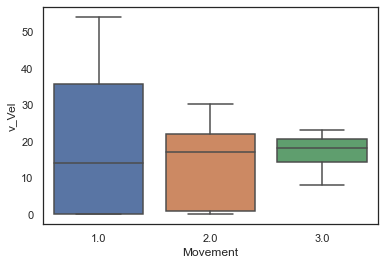

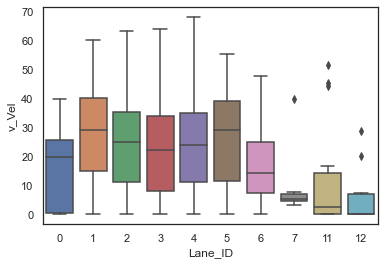

In [21]:
#Box plots for accerelation vs. relevent categorical varible
sns.boxplot(data=ngsim, x='v_Class', y='v_Vel')
plt.show()
sns.boxplot(data=ngsim, x='Location', y='v_Vel')
plt.show()
sns.boxplot(data=ngsim, x='Direction', y='v_Vel')
plt.show()
sns.boxplot(data=ngsim, x='Movement', y='v_Vel')
plt.show()
sns.boxplot(data=ngsim, x='Lane_ID', y='v_Vel')
plt.show()

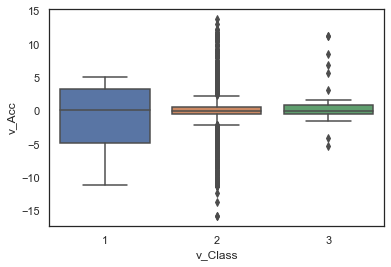

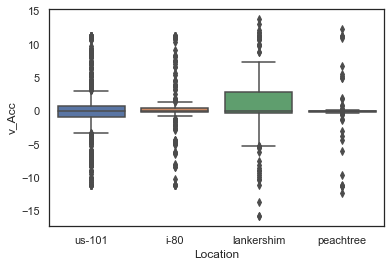

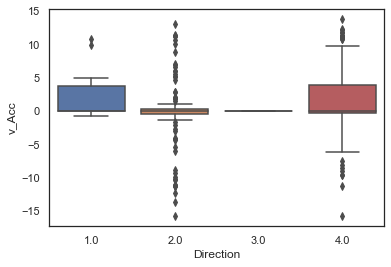

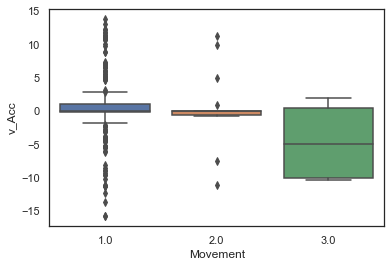

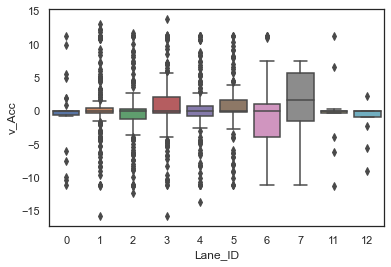

In [22]:
#Box plots for accerelation vs. relevent categorical varible
sns.boxplot(data=ngsim, x='v_Class', y='v_Acc')
plt.show()
sns.boxplot(data=ngsim, x='Location', y='v_Acc')
plt.show()
sns.boxplot(data=ngsim, x='Direction', y='v_Acc')
plt.show()
sns.boxplot(data=ngsim, x='Movement', y='v_Acc')
plt.show()
sns.boxplot(data=ngsim, x='Lane_ID', y='v_Acc')
plt.show()


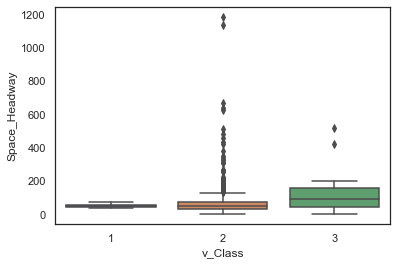

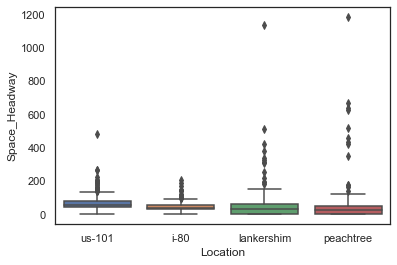

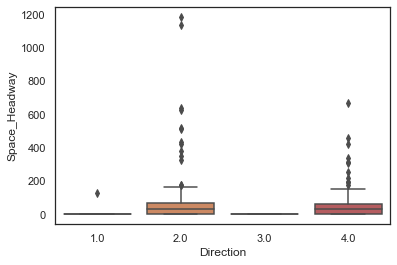

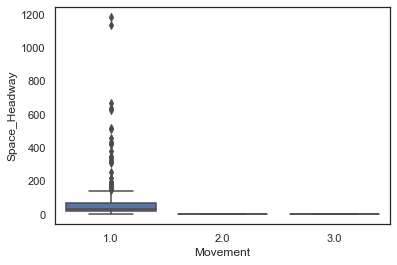

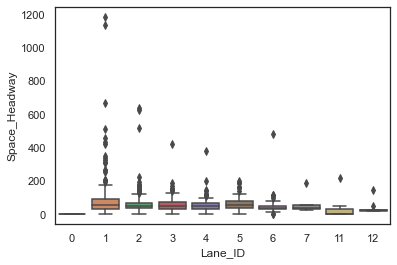

In [23]:
#Box plots for accerelation vs. relevent categorical varible
sns.boxplot(data=ngsim, x='v_Class', y='Space_Headway')
plt.show()
sns.boxplot(data=ngsim, x='Location', y='Space_Headway')
plt.show()
sns.boxplot(data=ngsim, x='Direction', y='Space_Headway')
plt.show()
sns.boxplot(data=ngsim, x='Movement', y='Space_Headway')
plt.show()
sns.boxplot(data=ngsim, x='Lane_ID', y='Space_Headway')
plt.show()

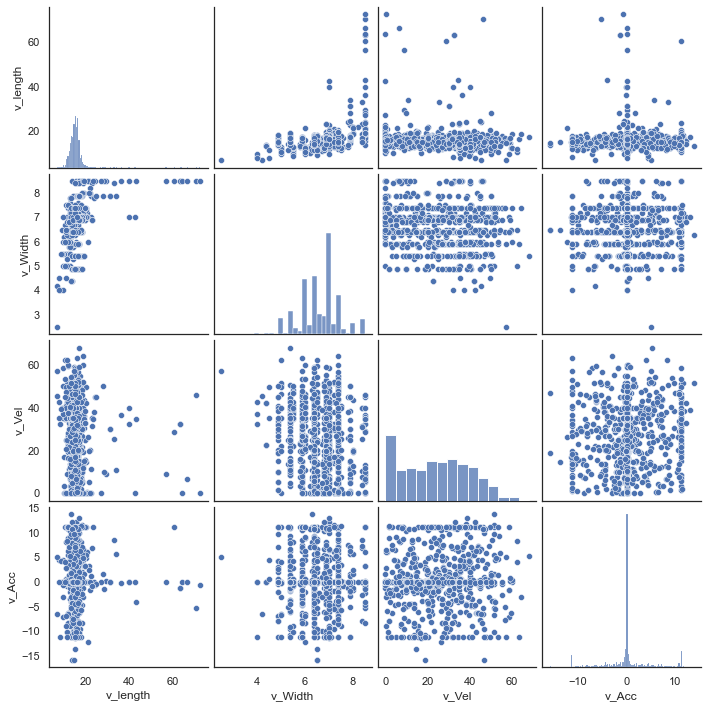

In [24]:
sample2 = ngsim[ ["v_length",
"v_Width",
"v_Vel",
"v_Acc"
]]
sns.pairplot(sample2)

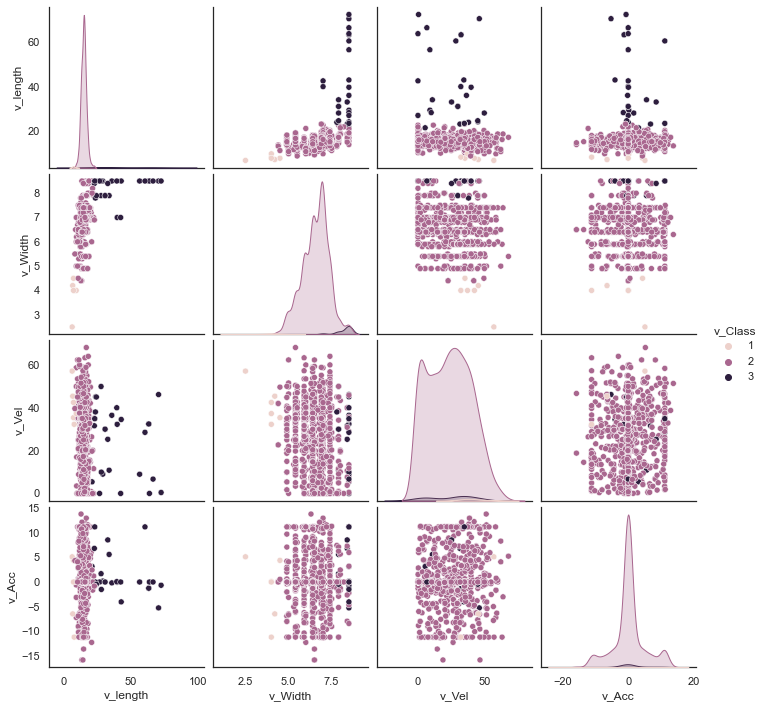

In [25]:
sample1 = ngsim[ ["v_length",
"v_Width",
"v_Class",
"v_Vel",
"v_Acc"
]]
sns.pairplot(sample1, hue="v_Class")

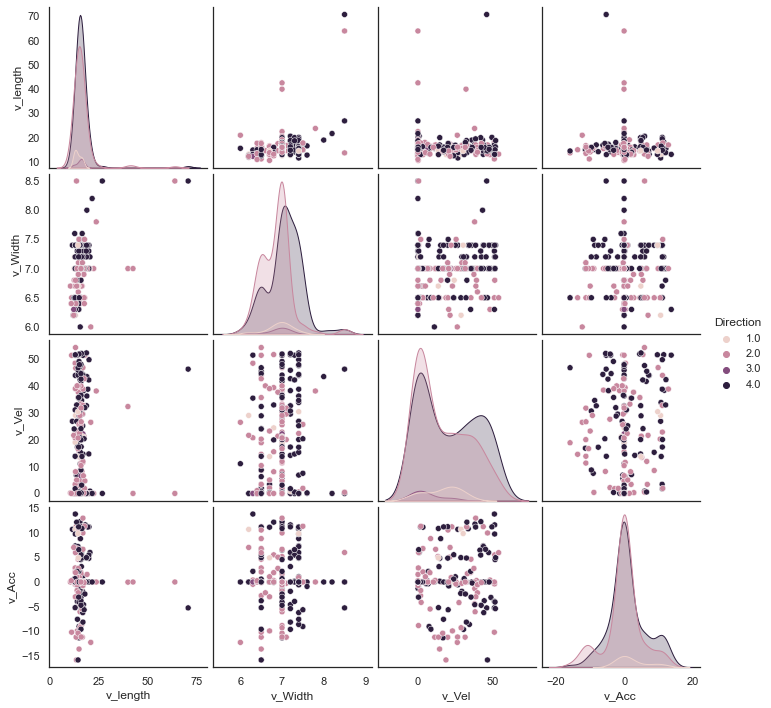

In [26]:
sample2 = ngsim[ ["v_length",
"v_Width",
"Direction",
"v_Vel",
"v_Acc"
]]
sns.pairplot(sample2, hue="Direction")

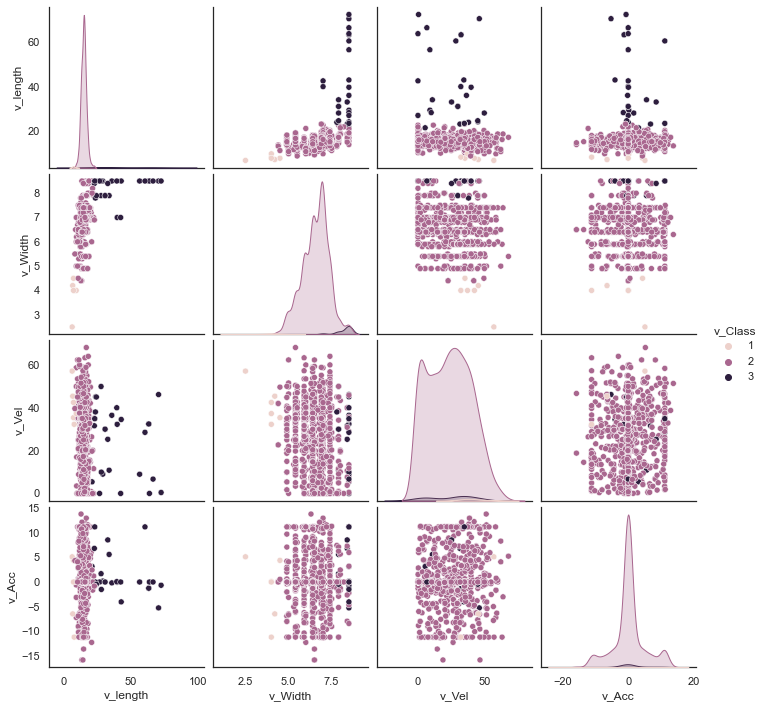

In [27]:
sample2 = ngsim[ ["v_length",
"v_Width",
"v_Vel",
"v_Class",
"v_Acc"
]]
sns.pairplot(sample2,hue="v_Class")

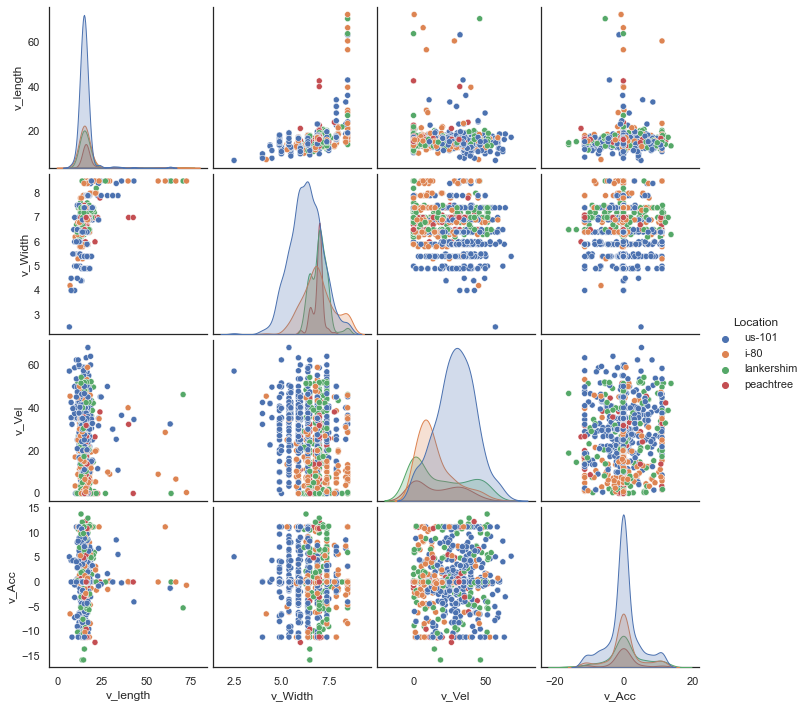

In [28]:
sample2 = ngsim[ ["v_length",
"v_Width",
"Location",
"v_Vel",
"v_Acc"
]]
sns.pairplot(sample2, hue="Location")